Registration of spatial transcriptomics data with Moscot
========================================================

This tutorial shows how to use **Moscot** for registration of spatial transcriptomics data.

- [code](https://github.com/theislab/moscot)
- [tutorial](https://moscot.readthedocs.io/en/latest/tutorials/tutorial_spatial_alignment.html)

Most of this code is taken from the original moscot tutorial, but applied to new data.

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

import os
import pathlib
import anndata as ad
import pandas as pd
import numpy as np
import moscot as mt
import squidpy as sq
from jax.config import config
config.update("jax_enable_x64", True)

%load_ext nb_black
%load_ext autoreload
%autoreload 2
sc.set_figure_params(figsize=(4, 4), frameon=False)

/Users/giovanni.palla/miniconda3/envs/squidpy39/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'tag' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


<IPython.core.display.Javascript object>

In [2]:
# set path
path = pathlib.Path("/Users/giovanni.palla/Datasets/advomics_data_spatial")

<IPython.core.display.Javascript object>

In [3]:
files = ["V10F24-105_A1.h5ad", "V10S28-371_A1.h5ad", "V10F24-105_C1.h5ad"]
adatas = {}
for f in files:
    adata = sc.read(path / f)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adatas[f.strip(".h5ad")] = adata

<IPython.core.display.Javascript object>

In [4]:
adata = ad.concat(adatas, label="library_id", uns_merge="unique")

/Users/giovanni.palla/Projects/anndata/anndata/_core/anndata.py:1857: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<IPython.core.display.Javascript object>

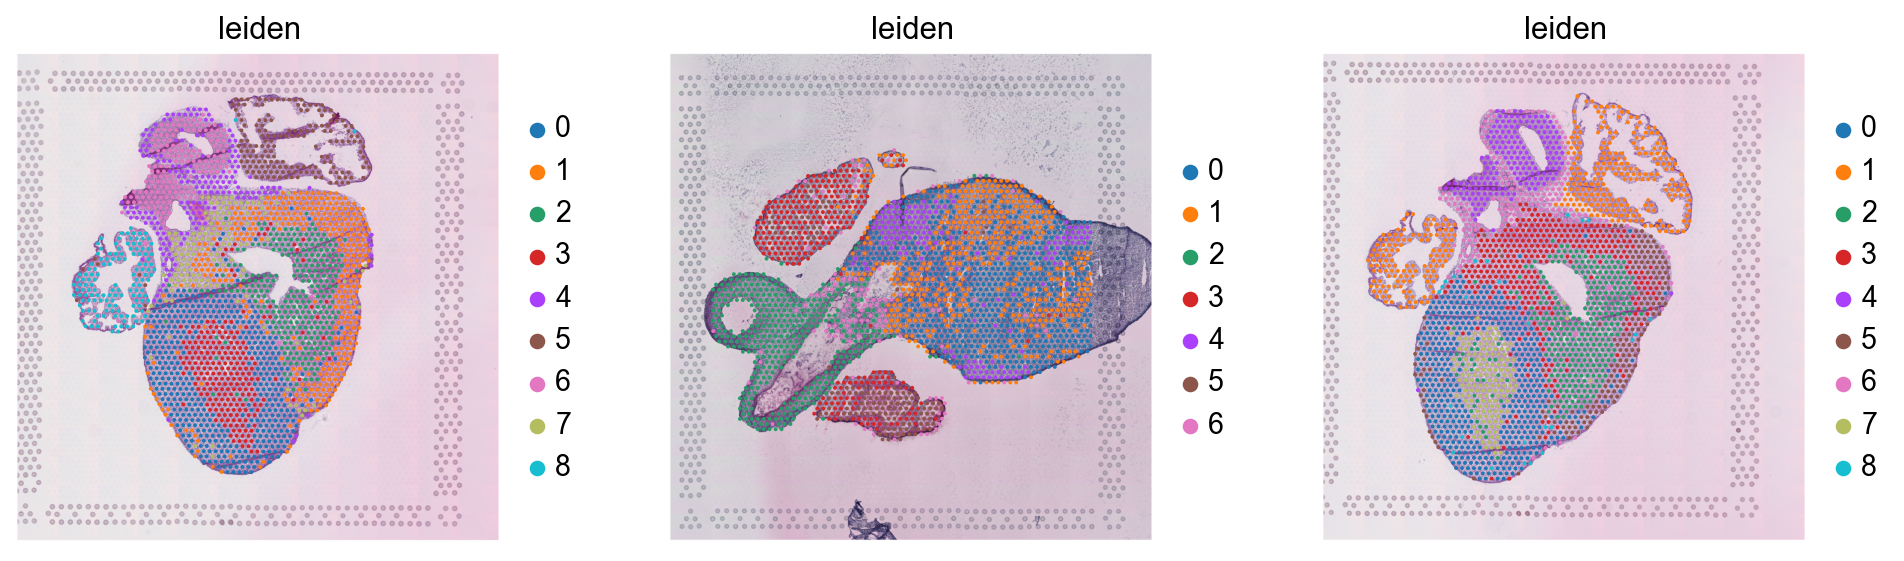

<IPython.core.display.Javascript object>

In [5]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden")

Let's set out to solve an alignment (registration) problem with Optimal Transport

In [6]:
ap = mt.problems.space.AlignmentProblem(adata).prepare(batch_key="library_id", policy="sequential").solve(epsilon=1e-1)

INFO     Computing pca with `n_comps=30` using `adata.X`                                                           
INFO     Computing pca with `n_comps=30` using `adata.X`                                                           
INFO     Solving problem OTProblem[stage='prepared', shape=(2182, 2250)].                                          
INFO     Solving problem OTProblem[stage='prepared', shape=(2169, 2182)].                                          


<IPython.core.display.Javascript object>

We can then use the optimal transport map to align the data.

In [7]:
ap.align(reference="V10S28-371_A1")

<IPython.core.display.Javascript object>

And visualize both aligned and original coordinates

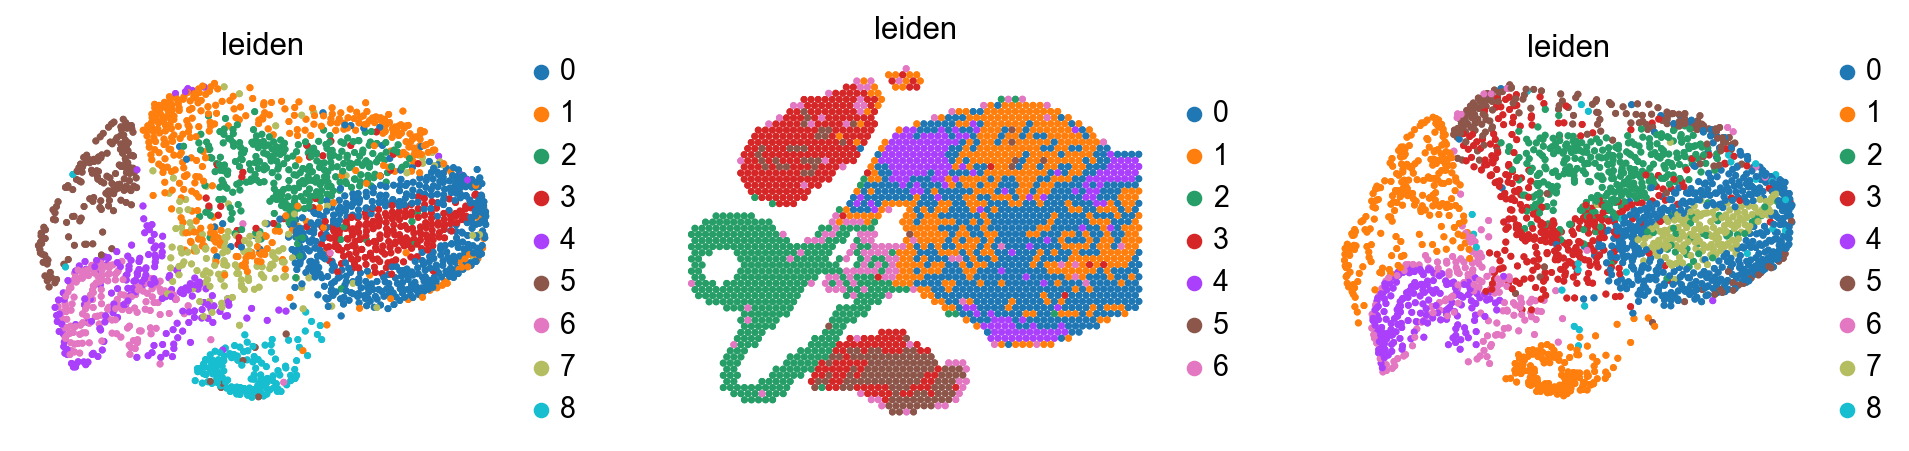

<IPython.core.display.Javascript object>

In [8]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden", shape=None, spatial_key="spatial_warp")

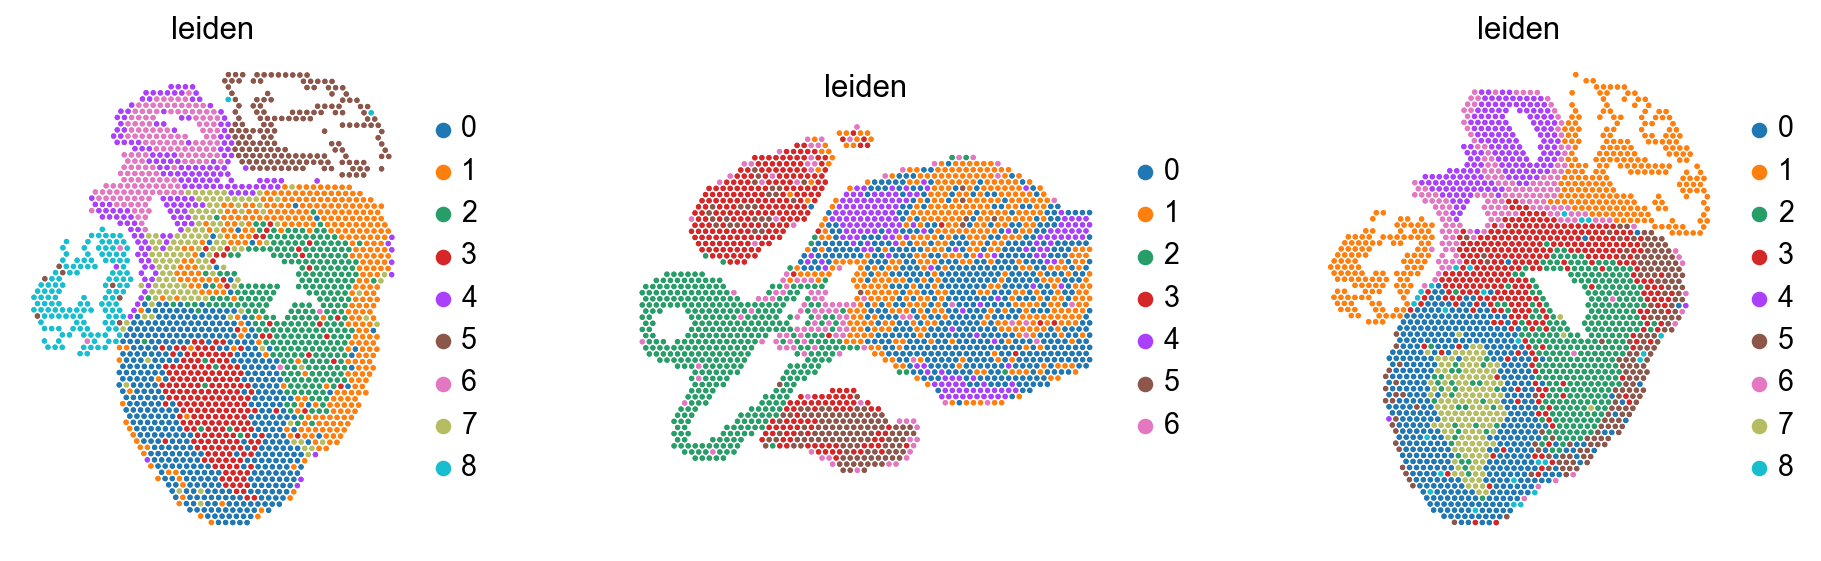

<IPython.core.display.Javascript object>

In [9]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden", shape=None, spatial_key="spatial")